#  Chapter20 深度学习的参数调校

- **20.1 超参数**
    - **20.1.1 超参数**
<br><br>
- **20.2 网络结构**
    - **20.2.1 网络结构**
<br><br>
- **20.3 Dropout**
    - **20.3.1 Dropout**
<br><br>
- **20.4 激励函数**
    - **20.4.1 激励函数的作用**
    - **20.4.2 sigmoid 函数**
    - **20.4.3 ReLU 函数**
<br><br>
- **20.5 损失函数**
    - **20.5.1 损失函数的种类**
    - **20.5.2 平方误差**
    - **20.5.3 交叉熵误差**
<br><br>
- **20.6 最优化函数**
    - **20.6.1 最优化函数**
<br><br>
- **20.7 学习率**
    - **20.7.1 学习率**
<br><br>
- **20.8 小批次学习**
    - **20.8.1 小批次学习**
<br><br>
- **20.9 反复学习**
    - **20.9.1 反复学习**
<br><br>
- **20.10 附加习题**

## ●20.1 超参数

### 〇20.1.1 超参数

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
# 超参数 ：激励函数
model.add(Activation("sigmoid"))
# 超参数 ：隐藏层的数量，隐藏层的通道数
model.add(Dense(128))
model.add(Activation("sigmoid"))
# 超参数 ：Dropout 的比例
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

# 超参数 ：学习率（lr)
sgd = optimizers.SGD(lr=0.01)

# 超参数 ：最优化函数（optimizer）
# 超参数 ：损失函数（loss）
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

# 超参数 ：批次尺寸（batch_size）
# 超参数 ：epochs 数（epochs）
model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

**程序清单20.1：超参数的示例**

## ●20.2 网络结构

### 〇20.2.1 网络结构 

#### □习题

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))

def funcA():
    model.add(Dense(128))
    model.add(Activation("sigmoid"))

def funcB():
    model.add(Dense(128))
    model.add(Activation("sigmoid"))
    model.add(Dense(128))
    model.add(Activation("sigmoid"))
    model.add(Dense(128))
    model.add(Activation("sigmoid"))

def funcC():
    model.add(Dense(1568))
    model.add(Activation("sigmoid"))

# 请注释掉其中的两行
# ---------------------------
funcA()
funcB()
funcC()
# ---------------------------

model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

**程序清单20.2：习题**

#### □参考答案

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))

def funcA():
    model.add(Dense(128))
    model.add(Activation("sigmoid"))

def funcB():
    model.add(Dense(128))
    model.add(Activation("sigmoid"))
    model.add(Dense(128))
    model.add(Activation("sigmoid"))
    model.add(Dense(128))
    model.add(Activation("sigmoid"))

def funcC():
    model.add(Dense(1568))
    model.add(Activation("sigmoid"))

# 请注释掉其中的两行
#---------------------------
funcA()
#funcB()
#funcC()
#---------------------------

model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Using TensorFlow backend.


Epoch 1/3
6000/6000 [==============================] - 1s 143us/step - loss: 1.7670 - acc: 0.4120
Epoch 2/3
6000/6000 [==============================] - 1s 125us/step - loss: 1.0583 - acc: 0.6577
Epoch 3/3
6000/6000 [==============================] - 1s 136us/step - loss: 0.8907 - acc: 0.7157
evaluate loss: 0.7422365880012513
evaluate acc: 0.782


**程序清单20.3：参考答案**

## ●20.3 Dropout

### 〇20.3.1 Dropout

#### □习题

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))

# ---------------------------
# 请在此处输入代码
# ---------------------------

model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test))

#acc、val_accのプロット
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

**程序清单20.4：习题**

#### □参考答案

Train on 6000 samples, validate on 1000 samples
Epoch 1/5
6000/6000 [==============================] - 1s 186us/step - loss: 1.7093 - acc: 0.4225 - val_loss: 1.0756 - val_acc: 0.7270
Epoch 2/5
6000/6000 [==============================] - 1s 108us/step - loss: 1.0370 - acc: 0.6692 - val_loss: 0.8398 - val_acc: 0.7610
Epoch 3/5
6000/6000 [==============================] - 1s 108us/step - loss: 0.8752 - acc: 0.7247 - val_loss: 0.7204 - val_acc: 0.8060
Epoch 4/5
6000/6000 [==============================] - 1s 109us/step - loss: 0.8071 - acc: 0.7425 - val_loss: 0.7205 - val_acc: 0.7860
Epoch 5/5
6000/6000 [==============================] - 1s 111us/step - loss: 0.7462 - acc: 0.7618 - val_loss: 0.6435 - val_acc: 0.8310


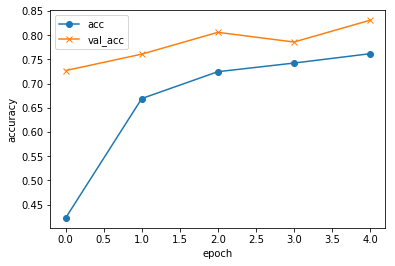

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
# ---------------------------
# 请在此处输入代码
model.add(Dropout(rate=0.5))
# ---------------------------
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=5, verbose=1, validation_data=(X_test, y_test))

# acc、 val_acc 的绘制
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

**程序清单20.5：参考答案（输出结果可能和实际界面有所不同）**

## ●20.4 激励函数

### 〇20.4.1 激励函数的作用

本节没有示例文件

### 〇20.4.2 sigmoid 函数

本节没有示例文件

### 〇20.4.3 ReLU 函数

本节没有示例文件

## ●20.5 损失函数

### 〇20.5.1 损失函数的种类

本节没有示例文件

### 〇20.5.2 平方误差

本节没有示例文件

### 〇20.5.3 交叉熵误差

本节没有示例文件

## ●20.6 最优化函数

### 〇20.6.1 最优化函数

本节没有示例文件

## ●20.7 学习率

### ○20.7.1 学习率

**习题**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))


def funcA():
    global lr
    lr = 0.01

def funcB():
    global lr
    lr = 0.1

def funcC():
    global lr
    lr = 1.0

# 请注释掉其中的两行，确定学习率的大小
# ---------------------------
funcA()
funcB()
funcC()
# ---------------------------

sgd = optimizers.SGD(lr=lr)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

**程序清单20.6：习题**

#### □参考答案

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))


def funcA():
    global lr
    lr = 0.01

def funcB():
    global lr
    lr = 0.1

def funcC():
    global lr
    lr = 1.0

# 请注释掉其中的两行，确定学习率的大小
# ---------------------------
# funcA()
funcB()
# funcC()
# ---------------------------

sgd = optimizers.SGD(lr=lr)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=32, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/3
6000/6000 [==============================] - 1s 188us/step - loss: 1.7546 - acc: 0.4112
Epoch 2/3
6000/6000 [==============================] - 1s 126us/step - loss: 1.0164 - acc: 0.6782
Epoch 3/3
6000/6000 [==============================] - 1s 128us/step - loss: 0.8506 - acc: 0.7350
evaluate loss: 0.7203813996315003
evaluate acc: 0.807


**程序清单20.7：参考答案（输出结果可能和实际界面有所不同）**

## ●20.8 小批次学习

### ○20.8.1 小批次学习

#### □习题

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

def funcA():
    global batch_size
    batch_size = 16

def funcB():
    global batch_size
    batch_size = 32

def funcC():
    global batch_size
    batch_size = 64

# 请注释掉其中的两行，确定 batch_size 的大小
# ---------------------------
# batch_size: 16
funcA()
# batch_size: 32
funcB()
# batch_size: 64
funcC()
# ---------------------------

model.fit(X_train, y_train, batch_size=batch_size, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

**程序清单20.8：习题**

#### □参考答案

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

def funcA():
    global batch_size
    batch_size = 16

def funcB():
    global batch_size
    batch_size = 32

def funcC():
    global batch_size
    batch_size = 64

# 请注释掉其中的两行，确定 batch_size 的大小
# ---------------------------
# batch_size: 16
# funcA()import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

def funcA():
    global batch_size
    batch_size = 16

def funcB():
    global batch_size
    batch_size = 32

def funcC():
    global batch_size
    batch_size = 64

# 请注释掉其中的两行，确定 batch_size 的大小
# ---------------------------
# batch_size: 16
# funcA()
# batch_size: 32
# funcB()
# batch_size: 64
funcC()
# ---------------------------

model.fit(X_train, y_train, batch_size=batch_size, epochs=3, verbose=1)

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

Epoch 1/3
6000/6000 [==============================] - 1s 147us/step - loss: 1.8868 - acc: 0.3663
Epoch 2/3
6000/6000 [==============================] - 1s 96us/step - loss: 1.1446 - acc: 0.6557
Epoch 3/3
6000/6000 [==============================] - 1s 83us/step - loss: 0.8448 - acc: 0.7617
evaluate loss: 0.6808103404045105
evaluate acc: 0.829


**程序清单20.9：参考答案（输出结果可能和实际界面有所不同）** 

## ●20.9 反复学习

### ○20.9.1 反复学习

#### □习题

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:1500]
X_test = X_test.reshape(X_test.shape[0], 784)[:6000]
y_train = to_categorical(y_train)[:1500]
y_test = to_categorical(y_test)[:6000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
# 在此处不使用 Dropout
#model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

def funcA():
    global epochs
    epochs = 5

def funcB():
    global epochs
    epochs = 10

def funcC():
    global epochs
    epochs = 60

# 请注释掉其中的两行，确定 epochs 数的大小
# ---------------------------
# epochs: 5
funcA()
# epochs: 10
funcB()
# epochs: 60
funcC()
# ---------------------------

history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

#acc 和 val_acc 的绘制
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

**程序清单20.10：习题**

#### □参考答案

Train on 1500 samples, validate on 6000 samples
Epoch 1/10
1500/1500 [==============================] - 1s 497us/step - loss: 2.0076 - acc: 0.3667 - val_loss: 1.7191 - val_acc: 0.5618
Epoch 2/10
1500/1500 [==============================] - 0s 310us/step - loss: 1.4583 - acc: 0.6667 - val_loss: 1.3321 - val_acc: 0.6878
Epoch 3/10
1500/1500 [==============================] - 0s 252us/step - loss: 1.0898 - acc: 0.7707 - val_loss: 1.0424 - val_acc: 0.7233
Epoch 4/10
1500/1500 [==============================] - 0s 254us/step - loss: 0.8779 - acc: 0.7993 - val_loss: 0.9073 - val_acc: 0.7435
Epoch 5/10
1500/1500 [==============================] - 0s 247us/step - loss: 0.7484 - acc: 0.8300 - val_loss: 0.8399 - val_acc: 0.7772
Epoch 6/10
1500/1500 [==============================] - 0s 248us/step - loss: 0.6766 - acc: 0.8520 - val_loss: 0.7846 - val_acc: 0.7737
Epoch 7/10
1500/1500 [==============================] - 0s 237us/step - loss: 0.6222 - acc: 0.8573 - val_loss: 0.7558 - val_acc: 0.7782


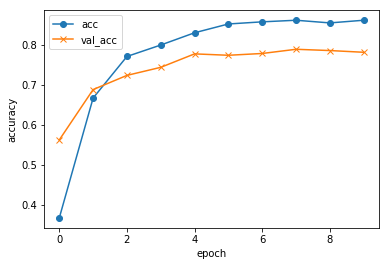

evaluate loss: 0.729700302918752
evaluate acc: 0.7811666666666667


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:1500]
X_test = X_test.reshape(X_test.shape[0], 784)[:6000]
y_train = to_categorical(y_train)[:1500]
y_test = to_categorical(y_test)[:6000]

model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
# 在此处不使用 Dropout
#model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)

model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

def funcA():
    global epochs
    epochs = 5

def funcB():
    global epochs
    epochs = 10

def funcC():
    global epochs
    epochs = 60

# 请注释掉其中的两行，确定 epochs 数的大小
# ---------------------------
# epochs: 5
# funcA()
# epochs: 10
funcB()
# epochs: 60
# funcC()
# ---------------------------

history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, verbose=1, validation_data=(X_test, y_test))

#acc 和 val_acc 的绘制
plt.plot(history.history["acc"], label="acc", ls="-", marker="o")
plt.plot(history.history["val_acc"], label="val_acc", ls="-", marker="x")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(loc="best")
plt.show()

score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))

**程序清单20.11：参考答案（输出结果可能和实际界面有所不同）**　　

## ●附加习题

#### □习题

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

#---------------------------
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=10, epochs=5, verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))
#---------------------------



**程序清单20.12：习题**

#### □参考答案

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Activation, Dense, Dropout
from keras.models import Sequential, load_model
from keras import optimizers
from keras.utils.np_utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784)[:6000]
X_test = X_test.reshape(X_test.shape[0], 784)[:1000]
y_train = to_categorical(y_train)[:6000]
y_test = to_categorical(y_test)[:1000]

#---------------------------
model = Sequential()
model.add(Dense(256, input_dim=784))
model.add(Activation("sigmoid"))
model.add(Dense(128))
model.add(Activation("sigmoid"))
model.add(Dropout(rate=0.5))
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, batch_size=96, epochs=5, verbose=1)
score = model.evaluate(X_test, y_test, verbose=0)
print("evaluate loss: {0[0]}\nevaluate acc: {0[1]}".format(score))
#---------------------------

Epoch 1/5
6000/6000 [==============================] - 1s 110us/step - loss: 2.0149 - acc: 0.2995
Epoch 2/5
6000/6000 [==============================] - 0s 81us/step - loss: 1.3310 - acc: 0.5955
Epoch 3/5
6000/6000 [==============================] - 0s 74us/step - loss: 0.9829 - acc: 0.7138
Epoch 4/5
6000/6000 [==============================] - 0s 73us/step - loss: 0.7943 - acc: 0.7763: 0s - loss: 0.8733 - acc
Epoch 5/5
6000/6000 [==============================] - 0s 65us/step - loss: 0.6871 - acc: 0.8143
evaluate loss: 0.595065972328186
evaluate acc: 0.857


**程序清单20.13：参考答案（输出结果可能和实际界面有所不同）**